## Understanding the transform and projection keywords

This notebook helps understand the `transform` and `projection` keywords, which can easily be confused.

The core concept is that the projection of your axes is independent of the coordinate system your data is defined in. The `projection` argument is used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like). The `transform` argument to plotting functions tells Cartopy what coordinate system your data are defined in.

In [1]:
# Create dummy data on a regular lat/lon grid
import numpy as np


lon = np.linspace(-80, 80, 25)
lat = np.linspace(30, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)

data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)

Let’s try making a plot in the `PlateCarree` projection without specifying the `transform` argument. Since the data happen to be defined in the same coordinate system as we are plotting in, this actually works correctly:

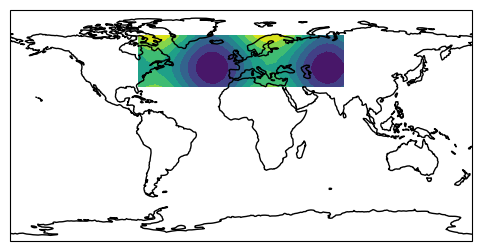

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


# The projection keyword determines how the plot will look
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

ax.contourf(lon, lat, data)  # didn't use transform, but looks ok...
plt.show()

Now let’s add in the transform keyword when we plot:

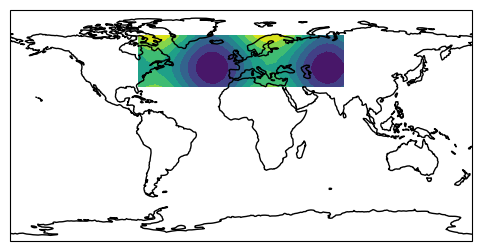

In [4]:
# The data are defined in lat/lon coordinate system, so PlateCarree()
# is the appropriate choice:
data_crs = ccrs.PlateCarree()

# The projection keyword determines how the plot will look
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

ax.contourf(lon, lat, data, transform=data_crs)
plt.show()

See that the plot doesn’t change? This is because the default assumption when the `transform` argument is not supplied is that the coordinate system matches the projection, which has been the case so far.

Now we’ll try this again but using a different projection for our plot. We’ll plot onto a rotated pole projection, and we’ll omit the `transform` argument to see what happens:

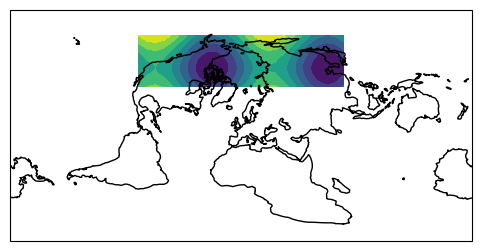

In [5]:
# Now we plot a rotated pole projection
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

ax.contourf(lon, lat, data)  # didn't use transform, uh oh!
plt.show()

The resulting plot is incorrect! We didn’t tell Cartopy what coordinate system our data are defined in, so it assumed it was the same as the projection we are plotting on, and the data are plotted in the wrong place.

We can fix this by supplying the `transform` argument, which remains the same as before since the data’s coordinate system hasn’t changed:

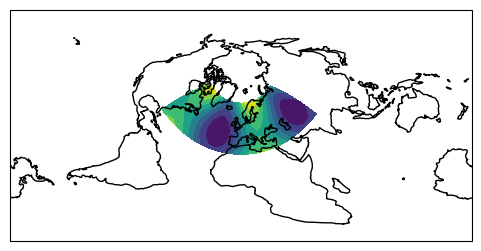

In [6]:
# A rotated pole projection again...
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

# ...but now using the transform argument
ax.contourf(lon, lat, data, transform=data_crs)
plt.show()

The safest thing to do is always provide the `transform` keyword regardless of the projection you are using, and avoid letting Cartopy make assumptions about your data’s coordinate system. Doing so allows you to choose any map projection for your plot and allow Cartopy to plot your data where it should be:

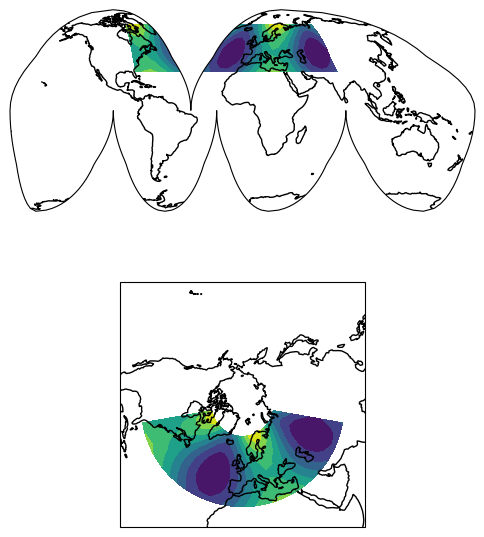

In [7]:
# We can choose any projection we like...
projection = ccrs.InterruptedGoodeHomolosine()
plt.figure(figsize=(6, 7))
ax1 = plt.subplot(211, projection=projection)
ax1.set_global()
ax1.coastlines()
ax2 = plt.subplot(212, projection=ccrs.NorthPolarStereo())
ax2.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax2.coastlines()

# ...as long as we provide the correct transform, the plot will be correct
ax1.contourf(lon, lat, data, transform=data_crs)
ax2.contourf(lon, lat, data, transform=data_crs)
plt.show()